# K-Means 算法

K-Means 算法属于无监督学习的聚类算法。

本实例实现用 K-Means 完成鸢尾花分类任务，纯 Python 实现。

## 读取数据

In [1]:
import pandas as pd

data = pd.read_csv("../data/iris001.txt", header=0)
data.head()

,"1\t""id""",Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,"2\t""1""",5.1,3.5,1.4,0.2,setosa
1,"3\t""2""",4.9,3.0,1.4,0.2,setosa
2,"4\t""3""",4.7,3.2,1.3,0.2,setosa
3,"5\t""4""",4.6,3.1,1.5,0.2,setosa
4,"6\t""5""",5.0,3.6,1.4,0.2,setosa


K-Means 算法是无监督算法，不需要 label，我们这里的 label 用于最后进行评估。

In [2]:
x = data.iloc[:, [1, 2]].values
y = data.iloc[:, [5]].values

In [3]:
print(type(x))
print("example x：", x[0])
print(type(y))
print("example y：", y[0])

<class 'numpy.ndarray'>
example x： [5.1 3.5]
<class 'numpy.ndarray'>
example y： ['setosa']


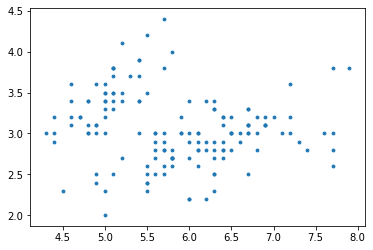

In [4]:
%matplotlib inline
import numpy as np  
import matplotlib.pyplot as plt

# Getting the values and plotting it
f1 = data['Sepal.Length'].values # x coordinates
f2 = data['Sepal.Width'].values # y coordinates
plt.scatter(f1, f2, s=8)

## K-Means 实现

### 定义距离计算函数

In [5]:
import math  
import numpy as np
from copy import deepcopy   #for copy array values instead of just copying the pointers

# Euclidean Distance Caculator
def dist(a, b, ax=1):       
    return np.linalg.norm(a - b, axis=ax)

### 随机初始化生成 k 个中心点

In [6]:
# define the number of clusters
k = 3
# generate k number's X coordinates of random centroids
centroids_x = np.random.uniform(np.min(f1), np.max(f1),  size=k)
# generate k number'Y coordinates of random centroids
centroids_y = np.random.uniform(np.min(f2), np.max(f2),  size=k)

centroids = np.array(list(zip(centroids_x, centroids_y)), dtype=np.float32)
print("Three random initialized centroids as a matrix: \n", centroids)

Three random initialized centroids as a matrix: 
 [[5.724498  2.615056 ]
 [5.7377014 2.2628114]
 [4.6981096 4.2087317]]


### 迭代算法

In [7]:
# To store the value of centroids when it updates
c_old = np.zeros(centroids.shape)

# init the cluster Lables(0, 1, 2), all 0
clusters = np.zeros(len(x))

# Error func: Distance between new centroids and old centroids
error = dist(centroids, c_old, None)
iteration = 0
# error is o when centroids do not change
while error != 0:
    iteration += 1
    # Assigning each value to its closest cluster
    for i in range(len(x)):
        # calculate the distance between this point and the three centroid point
        distances = dist(x[i], centroids)
        # get the centroid point that has less distance and set to its cluster
        cluster = np.argmin(distances)
        clusters[i] = cluster
        
    # Storing the old centroid values
    c_old = deepcopy(centroids)
    
    # After clustering, fine the new centroids by taking the average value
    for i in range(k):
        # all points in this cluster
        points = [ x[j] for j in range(len(x)) if clusters[j] == i ]
        # the mean value in this cluster, as new centroid point
        centroids[i] = np.mean(points, axis=0)
        
    # calculate the error, if it is not 0, turn to next iter
    error = dist(centroids, c_old, None)
    print("Iteration: %d ;Error: %f" % (iteration, error))

print("Afert %d iterations, the algorithm converge."  % iteration)

Iteration: 1 ;Error: 0.961480
Iteration: 2 ;Error: 0.356171
Iteration: 3 ;Error: 0.228870
Iteration: 4 ;Error: 0.101282
Iteration: 5 ;Error: 0.079839
Iteration: 6 ;Error: 0.079449
Iteration: 7 ;Error: 0.072060
Iteration: 8 ;Error: 0.015924
Iteration: 9 ;Error: 0.000000
Afert 9 iterations, the algorithm converge.


## 评估对比

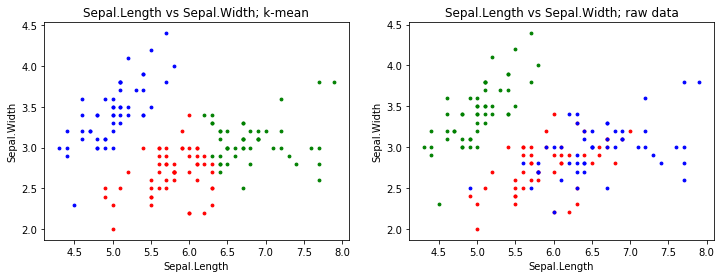

In [8]:
# compare y & y_predict in this cell, graphically or by other method (30 marks)

# colors to plot
colors = ['g', 'r', 'b']

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 4))

# y_predict
for i in range(k):
        points = np.array([x[j] for j in range(len(x)) if clusters[j] == i])
        ax1.scatter(points[:, 0], points[:, 1], s=8, c=colors[i])
ax1.set_title('Sepal.Length vs Sepal.Width; k-mean')
ax1.set_xlabel('Sepal.Length')
ax1.set_ylabel('Sepal.Width')

# y
all_type = {
    'setosa':0,
    'versicolor':1,
    'virginica':2
}
true_clusters = np.zeros(len(x))
for i in range(len(x)):
    true_clusters[i] = all_type[y[i][0]]
for i in range(k):
        points = np.array([ x[j] for j in range(len(x)) if true_clusters[j] == i])
        ax2.scatter(points[:, 0], points[:, 1], s=8, c=colors[i])
ax2.set_title('Sepal.Length vs Sepal.Width; raw data')
ax2.set_xlabel('Sepal.Length')
ax2.set_ylabel('Sepal.Width')

plt.show()

In [9]:
# accuracy calculator
def accuracy(x, y, y_predict):
    correct = 0
    total = 0
    for i in range(len(x)):
        if y[i] == y_predict[i]:
            correct += 1
        total += 1
    return correct/total

acc = accuracy(x, true_clusters, clusters)
print("The accuracy of k-means algorithm in current task is", acc)

The accuracy of k-means algorithm in current task is 0.25333333333333335
